In [1]:
import os
import sys
import pylab as p
import pylab as pl
import matplotlib as mpl
import pylab as pl
import datetime
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import csv
from sklearn.metrics import r2_score
from matplotlib.offsetbox import AnchoredText
import warnings
warnings.filterwarnings('ignore')
# Settings for matplotlib
plt.rcParams["font.family"] = "Arial"
mpl.rcParams['axes.linewidth'] = 2
plt.rcParams.update({'font.size': 16})

# avg = 90.735
# pES = 0.13
# 0.13 * wES + 0.87 * (wES - 2.8) = 90.735
# wES - 2.436 = 90.732
# wES = 93.2
# wGS = 90.4

In [2]:
#############################################################
# Analyze the structural factors for poor DFT predictions
# of A35-C1' and G34-C8 dw from ensemble when compared to RD.
# Plot the nts and bps structural parameters from DSSR vs
# conformer and compare correlated structural params vs diff 
# in CS prediction from DFT
# NUCLEOTIDE SPECIFIC PARAMETERS
#############################################################

In [4]:
# Read in DSSR data for whole library:
df_lib = pd.read_csv("data/lib_nts_dssr.csv")
# Read in chemical shift files:
cs = pd.read_csv("data/Orca_DFT/wtTAR_GS_ES1G34syn_Unbiased_LowestRMSD_DFT_VTSCF.csv").rename(
    columns={'res': 'res_no'})
# Define list of SAS selected 
#sas_indices = np.array([332,  367,  636,  683,  686,  997, 1196, 2295, 2615, 2751, 3051, 4151, 4348, 4460, 
#               4793, 4801, 6962, 8322, 9002, 9615], dtype=int)

sas_indices = np.array([332,  367,  636,  683,  686,  997, 1196, 2295, 2615, 2751, 3051, 
                    4151, 4348, 4460, 4793, 4801, 6962, 8322, 9002, 9615])

# Select only info for conformers in SAS selection
df = df_lib.loc[df_lib.conf_no.isin(sas_indices+1)]


GS average =  91.94744123875
GS C2'-endo =  90.97163653533335
GS C3'-endo =  92.53292406080001
ES average =  90.62521330600002
ES C2'-endo =  90.51691158800001
ES C3'-endo =  90.66131387866669


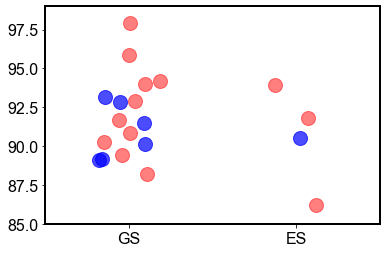

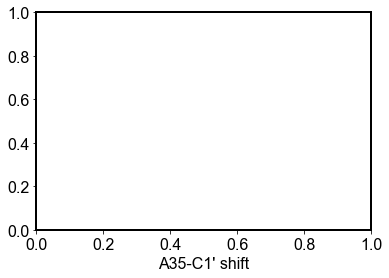

In [5]:
################# A35 - C1' ##################
# combine cs1 with df1:
shift_c1p = []
shift_aro = []
shift_c4p = []
for idx, row in df.iterrows():
    resnum = row['nt_resnum']
    ens_confnum = list(sas_indices).index(row['conf_no']-1)+1
    back_idx = -1 - (20-ens_confnum)    
    
    # Get sugar chemical shifts
    c1p_ = cs.loc[(cs['res_no'] == resnum) & (cs["atom"] == "C1'")].iloc[:,back_idx]
    c4p_ = cs.loc[(cs['res_no'] == resnum) & (cs["atom"] == "C4'")].iloc[:,back_idx]
        
    # Get aromatic chemical shifts
    if row['nt_resname'] == "GUA" or row['nt_resname'] == "ADE":
        aro_ = cs.loc[(cs['res_no'] == resnum) & ((cs["atom"] == "C8"))].iloc[:,back_idx]
    else:
        aro_ = cs.loc[(cs['res_no'] == resnum) & ((cs["atom"] == "C6"))].iloc[:,back_idx]
    
    
    # C1'
    if c1p_.shape[0] != 1:
        shift_c1p += [np.nan]
    else:
        shift_c1p += c1p_.tolist()
    # C4'
    if c4p_.shape[0] != 1:
        shift_c4p += [np.nan]
    else:
        shift_c4p += c4p_.tolist()
    # Aromatic
    if aro_.shape[0] != 1:
        shift_aro += [np.nan]
    else:
        shift_aro += aro_.tolist()
shift_c1p = np.array(shift_c1p, dtype=float)
shift_c4p = np.array(shift_c4p, dtype=float)
shift_aro = np.array(shift_aro, dtype=float)
df["shift_c1p"] = shift_c1p
df["shift_c4p"] = shift_c4p
df["shift_aro"] = shift_aro

dft = df.loc[df.nt_resnum == 35, ["conf_no", "shift_c1p"]]

shifts = dft["shift_c1p"].to_numpy()*1.067012 - 13.569042


gs_c2p_idx = np.array([1, 3, 5, 7,11, 16], dtype=int)-1
gs_c3p_idx = np.array([2, 4, 6, 8, 9, 10, 12, 13, 14, 15], dtype=int)-1
es_c2p_idx = np.array([17], dtype=int)-1
es_c3p_idx = np.array([18, 19, 20], dtype=int)-1

gs_c2p_avg = np.mean(shifts[gs_c2p_idx])
gs_c3p_avg = np.mean(shifts[gs_c3p_idx])
gs_avg = np.mean(shifts[gs_c2p_idx.tolist() + gs_c3p_idx.tolist()])
es_c2p_avg = np.mean(shifts[es_c2p_idx])
es_c3p_avg = np.mean(shifts[es_c3p_idx])
es_avg = np.mean(shifts[es_c2p_idx.tolist() + es_c3p_idx.tolist()])

print("GS average = ", gs_avg)
print("GS C2'-endo = ", gs_c2p_avg)
print("GS C3'-endo = ", gs_c3p_avg)

print("ES average = ", es_avg)
print("ES C2'-endo = ", es_c2p_avg)
print("ES C3'-endo = ", es_c3p_avg)

all_shifts = shifts.copy()

shifts = all_shifts[gs_c2p_idx]
plt.plot(np.random.normal(loc=0.0, scale=0.1, size=shifts.shape[0]) + 1, 
         shifts, ls="", marker="o", markersize=14, color="blue", alpha=0.7)

shifts = all_shifts[gs_c3p_idx]
plt.plot(np.random.normal(loc=0.0, scale=0.1, size=shifts.shape[0]) + 1, 
         shifts, ls="", marker="o", markersize=14, color="red", alpha=0.5)

shifts = all_shifts[es_c2p_idx]
plt.plot(np.random.normal(loc=1.0, scale=0.1, size=shifts.shape[0]) + 1, 
         shifts, ls="", marker="o", markersize=14, color="blue", alpha=0.7)

shifts = all_shifts[es_c3p_idx]
plt.plot(np.random.normal(loc=1.0, scale=0.1, size=shifts.shape[0]) + 1, 
         shifts, ls="", marker="o", markersize=14, color="red", alpha=0.5)

plt.xlim([0.5, 2.5])
plt.ylim([85, 99])
plt.xticks([1, 2], labels=["GS", "ES"])
plt.show()
plt.xlabel("A35-C1' shift")
plt.show()


SystemExit: 0

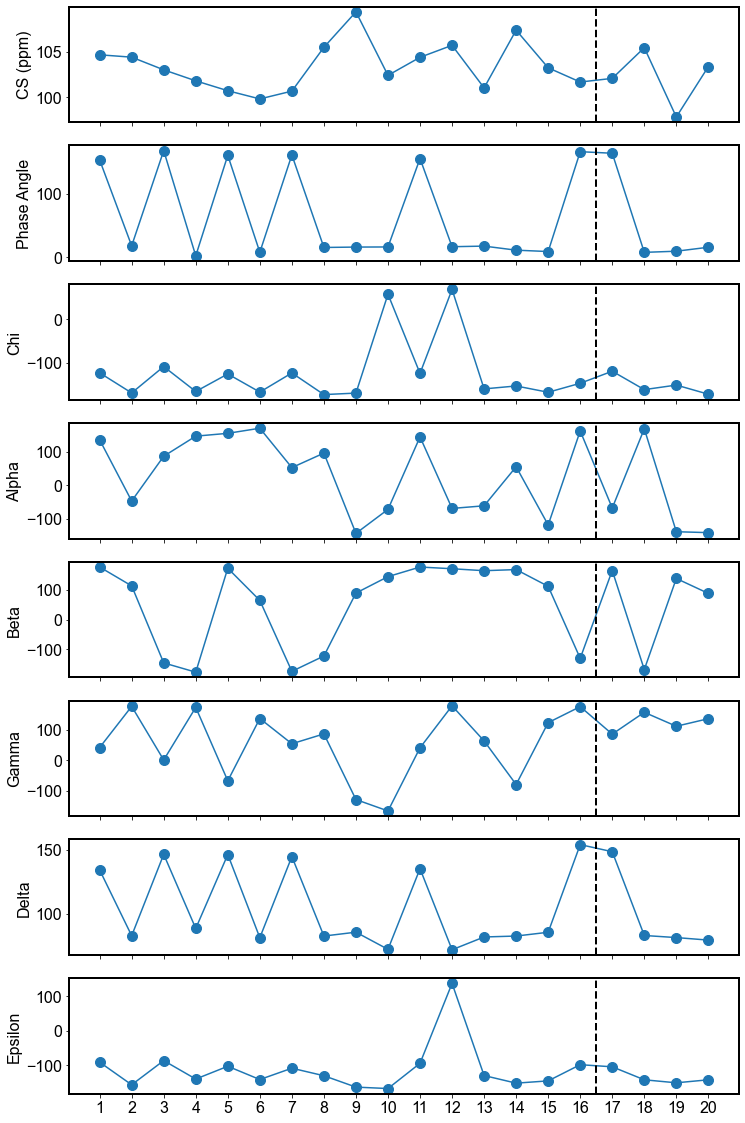

In [6]:
# Replicate 1:
# A35-C1p: Plot just w for each conformer:

# use the linear correction previously observed:
m = 1.05
c = -0.36

# Defined ES and GS measured chemical shifts:


# Filter out A35 data from DF & calculate new conf_nos:
df_t = df.loc[(df["nt_resnum"] == 35)].copy()
ens_confnums = []
for ix, row in df_t.iterrows():
    ens_confnum = list(sas_indices).index(row['conf_no']-1)+1
    ens_confnums.append(ens_confnum)
df_t["ens_confnums"] = ens_confnums

# C1' Chemical Shift
fig, axs = plt.subplots(8,1, figsize=(12, 20), sharex=True)
ax=axs[0]
colors = ["blue"] * 16 + ["red"] * 4
ax.plot(df_t.ens_confnums, df_t.shift_c1p*m+c, marker='o', markersize=10)
ax.set_ylabel("CS (ppm)")

# Phase Angle:
ax=axs[1]
ax.plot(df_t.ens_confnums, df_t["phase_angle"], marker='o', markersize=10)
ax.set_ylabel("Phase Angle")

# Chi Angle:
ax=axs[2]
ax.plot(df_t.ens_confnums, df_t["chi"], marker='o', markersize=10)
ax.set_ylabel("Chi")

# Alpha Angle:
ax=axs[3]
ax.plot(df_t.ens_confnums, df_t["alpha"], marker='o', markersize=10)
ax.set_ylabel("Alpha")

# Alpha Angle:
ax=axs[4]
ax.plot(df_t.ens_confnums, df_t["beta"], marker='o', markersize=10)
ax.set_ylabel("Beta")

# Alpha Angle:
ax=axs[5]
ax.plot(df_t.ens_confnums, df_t["gamma"], marker='o', markersize=10)
ax.set_ylabel("Gamma")

# Alpha Angle:
ax=axs[6]
ax.plot(df_t.ens_confnums, df_t["delta"], marker='o', markersize=10)
ax.set_ylabel("Delta")

# Alpha Angle:
ax=axs[7]
ax.plot(df_t.ens_confnums, df_t["epsilon"], marker='o', markersize=10)
ax.set_ylabel("Epsilon")

ticklabels = plt.xticks(df_t.ens_confnums)

for i in range(8):
    axs[i].axvline(16.5, ls="--", lw=2, color='k')

sys.exit(0)


In [7]:
#############################################################
# Analyze the structural factors for poor DFT predictions
# of A35-C1' and G34-C8 dw from ensemble when compared to RD.
# Plot the nts and bps structural parameters from DSSR vs
# conformer and compare correlated structural params vs diff 
# in CS prediction from DFT
# BASE PAIR SPECIFIC PARAMETERS
#############################################################

In [8]:
# Read in DSSR data for whole library:
df_lib = pd.read_csv("data/lib_bps_dssr.csv")
# Read in chemical shift files:
cs = pd.read_csv("data/Orca_DFT/wtTAR_GS_ES1G34syn_Unbiased_LowestRMSD_DFT_VTSCF.csv").rename(
    columns={'res': 'res_no'})
# Define list of SAS selected 
sas_indices = np.array([332,  367,  636,  683,  686,  997, 1196, 2295, 2615, 2751, 3051, 4151, 4348, 4460, 
               4793, 4801, 6962, 8322, 9002, 9615], dtype=int)
# Select only info for conformers in SAS selection
df = df_lib.loc[df_lib.conf_no.isin(sas_indices+1)]
print(df.head())
print(df.shape)

      conf_no    nt1    nt2   bp   LW conf1 conf2  planarity  interbase_angle  \
4583      333  GUA17  CYT45  G-C  cWW  anti  anti      0.086            6.450   
4584      333  GUA18  CYT44  G-C  cWW  anti  anti      0.081            7.434   
4585      333  CYT19  GUA43  C-G  cWW  anti  anti      0.029            1.951   
4586      333  ADE20  URA42  A-U  cWW  anti  anti      0.052            4.758   
4587      333  GUA21  CYT41  G-C  cWW  anti  anti      0.072            6.762   

      shear  stretch  buckle  propeller  
4583 -0.069   -0.160  -6.421     -0.606  
4584 -0.137   -0.135  -5.034     -5.470  
4585  0.158   -0.130  -0.473     -1.893  
4586  0.036   -0.074  -3.902     -2.722  
4587 -0.111   -0.120  -5.186     -4.339  
(245, 13)


SystemExit: 0

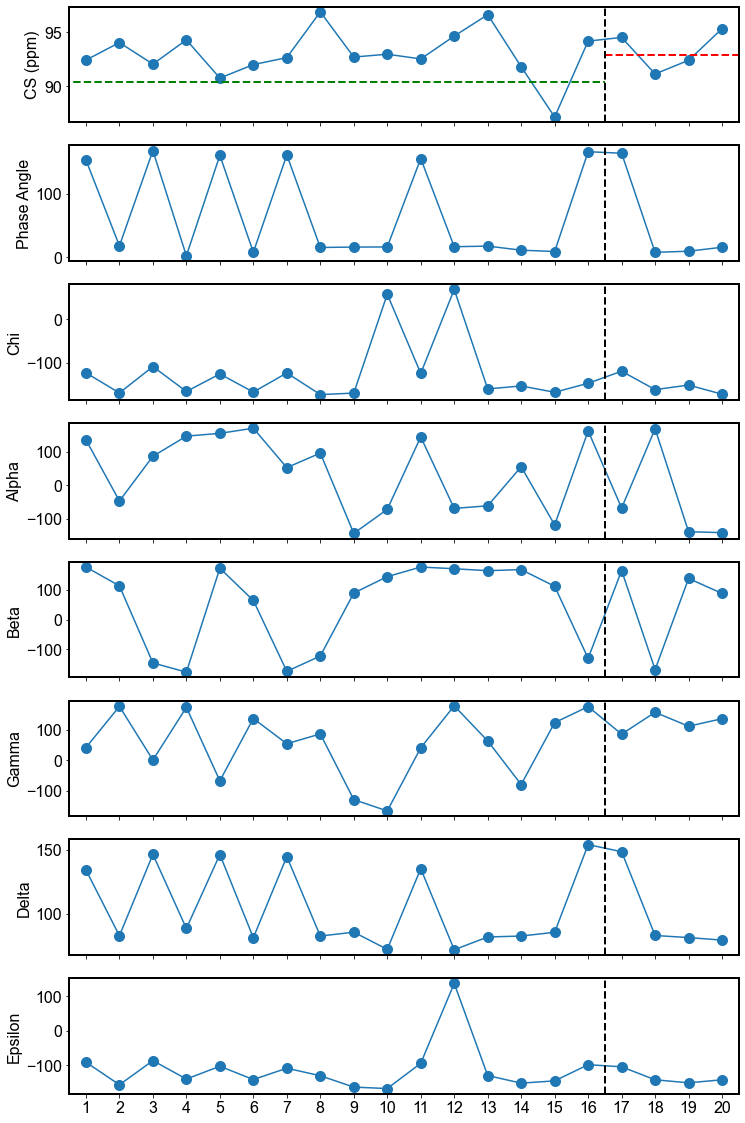

In [9]:
# Read in DSSR data for whole library:
df_lib = pd.read_csv("data/lib_nts_dssr.csv")
# Read in chemical shift files:
cs = pd.read_csv("data/Orca_DFT/wtTAR_Unbiased_NoClash_LowestRMSD_Ensemble.csv").rename(
    columns={'res': 'res_no'})
# Define list of SAS selected 
sas_indices = np.array([332,  367,  636,  683,  686,  997, 1196, 2295, 2615, 2751, 3051, 4151, 4348, 4460, 
               4793, 4801, 6962, 8322, 9002, 9615], dtype=int)
# Select only info for conformers in SAS selection
df = df_lib.loc[df_lib.conf_no.isin(sas_indices+1)]
################# A35 - C1' ##################
# combine cs1 with df1:
shift_c1p = []
shift_aro = []
shift_c4p = []
for idx, row in df.iterrows():
    resnum = row['nt_resnum']
    ens_confnum = list(sas_indices).index(row['conf_no']-1)+1
    back_idx = -1 - (20-ens_confnum)    
    
    # Get sugar chemical shifts
    c1p_ = cs.loc[(cs['res_no'] == resnum) & (cs["atom"] == "C1'")].iloc[:,back_idx]
    c4p_ = cs.loc[(cs['res_no'] == resnum) & (cs["atom"] == "C4'")].iloc[:,back_idx]
        
    # Get aromatic chemical shifts
    if row['nt_resname'] == "GUA" or row['nt_resname'] == "ADE":
        aro_ = cs.loc[(cs['res_no'] == resnum) & ((cs["atom"] == "C8"))].iloc[:,back_idx]
    else:
        aro_ = cs.loc[(cs['res_no'] == resnum) & ((cs["atom"] == "C6"))].iloc[:,back_idx]
    
    
    # C1'
    if c1p_.shape[0] != 1:
        shift_c1p += [np.nan]
    else:
        shift_c1p += c1p_.tolist()
    # C4'
    if c4p_.shape[0] != 1:
        shift_c4p += [np.nan]
    else:
        shift_c4p += c4p_.tolist()
    # Aromatic
    if aro_.shape[0] != 1:
        shift_aro += [np.nan]
    else:
        shift_aro += aro_.tolist()
shift_c1p = np.array(shift_c1p, dtype=float)
shift_c4p = np.array(shift_c4p, dtype=float)
shift_aro = np.array(shift_aro, dtype=float)
df["shift_c1p"] = shift_c1p
df["shift_c4p"] = shift_c4p
df["shift_aro"] = shift_aro


# Replicate 1:
# A35-C1': Plot just w for each conformer:
wGS = 90.36
wES = 92.86

# use the linear correction previously observed:
m = 1.07
c = -13.57

# Filter out A35 data from DF & calculate new conf_nos:
df_t = df.loc[(df["nt_resnum"] == 35)].copy()
ens_confnums = []
for ix, row in df_t.iterrows():
    ens_confnum = list(sas_indices).index(row['conf_no']-1)+1
    ens_confnums.append(ens_confnum)
df_t["ens_confnums"] = ens_confnums

# C1' Chemical Shift
fig, axs = plt.subplots(8,1, figsize=(12, 20), sharex=True)
ax=axs[0]
ax.plot(df_t.ens_confnums, df_t.shift_c1p*m+c, marker='o', markersize=10)
ax.hlines(y=wGS, linewidth=2, xmax=16.5, xmin=0, color='green', ls="--")
ax.hlines(y=wES, linewidth=2, xmax=20.5, xmin=16.5, color='red', ls= "--")
ax.set_ylabel("CS (ppm)")

# Phase Angle:
ax=axs[1]
ax.plot(df_t.ens_confnums, df_t["phase_angle"], marker='o', markersize=10)
ax.set_ylabel("Phase Angle")

# Chi Angle:
ax=axs[2]
ax.plot(df_t.ens_confnums, df_t["chi"], marker='o', markersize=10)
ax.set_ylabel("Chi")

# Alpha Angle:
ax=axs[3]
ax.plot(df_t.ens_confnums, df_t["alpha"], marker='o', markersize=10)
ax.set_ylabel("Alpha")

# Alpha Angle:
ax=axs[4]
ax.plot(df_t.ens_confnums, df_t["beta"], marker='o', markersize=10)
ax.set_ylabel("Beta")

# Alpha Angle:
ax=axs[5]
ax.plot(df_t.ens_confnums, df_t["gamma"], marker='o', markersize=10)
ax.set_ylabel("Gamma")

# Alpha Angle:
ax=axs[6]
ax.plot(df_t.ens_confnums, df_t["delta"], marker='o', markersize=10)
ax.set_ylabel("Delta")

# Alpha Angle:
ax=axs[7]
ax.plot(df_t.ens_confnums, df_t["epsilon"], marker='o', markersize=10)
ax.set_ylabel("Epsilon")

ticklabels = plt.xticks(df_t.ens_confnums)

for i in range(8):
    axs[i].axvline(16.5, ls="--", lw=2, color='k')
plt.xlim([0.5,20.5])
sys.exit(0)

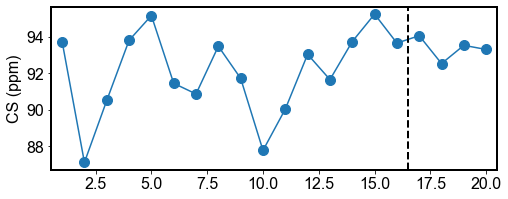

SystemExit: 0

In [10]:
# Replicate 1:
# C30-C1': Plot just w for each conformer:

# use the linear correction previously observed:
m=1.067012
c=-13.569042

# Defined ES and GS measured chemical shifts:
wES = 93.2
wGS = 90.4

# Filter out A35 data from DF & calculate new conf_nos:
df_t = df.loc[(df["nt_resnum"] == 30)].copy()
ens_confnums = []
for ix, row in df_t.iterrows():
    ens_confnum = list(sas_indices).index(row['conf_no']-1)+1
    ens_confnums.append(ens_confnum)
df_t["ens_confnums"] = ens_confnums

# C8 Chemical Shift
fig, axs = plt.subplots(1,1, figsize=(8, 3), sharex=True)
ax=axs
colors = ["blue"] * 16 + ["red"] * 4
ax.plot(df_t.ens_confnums, df_t.shift_c1p*m+c, marker='o', markersize=10)
#ax.hlines(y=wGS, linewidth=2, xmax=16.5, xmin=0, color='green', ls="--")
#ax.hlines(y=wES, linewidth=2, xmax=20.5, xmin=16.5, color='red', ls= "--")
ax.set_ylabel("CS (ppm)")


ax.axvline(16.5, ls="--", lw=2, color='k')
plt.xlim([0.5,20.5])
plt.show()
sys.exit(0)


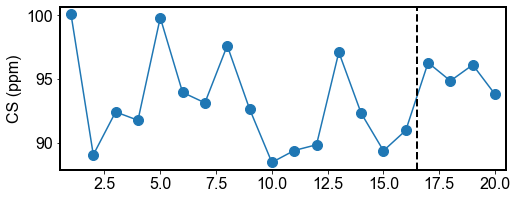

SystemExit: 0

In [11]:
# Replicate 1:
# U31-C1': Plot just w for each conformer:

# use the linear correction previously observed:
m=1.067012
c=-13.569042

# Defined ES and GS measured chemical shifts:
wES = 93.2
wGS = 90.4

# Filter out A35 data from DF & calculate new conf_nos:
df_t = df.loc[(df["nt_resnum"] == 31)].copy()
ens_confnums = []
for ix, row in df_t.iterrows():
    ens_confnum = list(sas_indices).index(row['conf_no']-1)+1
    ens_confnums.append(ens_confnum)
df_t["ens_confnums"] = ens_confnums

# C8 Chemical Shift
fig, axs = plt.subplots(1,1, figsize=(8, 3), sharex=True)
ax=axs
colors = ["blue"] * 16 + ["red"] * 4
ax.plot(df_t.ens_confnums, df_t.shift_c1p*m+c, marker='o', markersize=10)
#ax.hlines(y=wGS, linewidth=2, xmax=16.5, xmin=0, color='green', ls="--")
#ax.hlines(y=wES, linewidth=2, xmax=20.5, xmin=16.5, color='red', ls= "--")
ax.set_ylabel("CS (ppm)")


ax.axvline(16.5, ls="--", lw=2, color='k')
plt.xlim([0.5,20.5])
plt.show()
sys.exit(0)


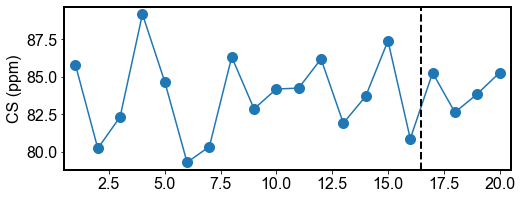

SystemExit: 0

In [12]:
# Replicate 1:
# U31-C4': Plot just w for each conformer:

# use the linear correction previously observed:
m=0.75
c=20.44

# Defined ES and GS measured chemical shifts:
wES = 93.2
wGS = 90.4

# Filter out A35 data from DF & calculate new conf_nos:
df_t = df.loc[(df["nt_resnum"] == 31)].copy()
ens_confnums = []
for ix, row in df_t.iterrows():
    ens_confnum = list(sas_indices).index(row['conf_no']-1)+1
    ens_confnums.append(ens_confnum)
df_t["ens_confnums"] = ens_confnums

# C8 Chemical Shift
fig, axs = plt.subplots(1,1, figsize=(8, 3), sharex=True)
ax=axs
colors = ["blue"] * 16 + ["red"] * 4
ax.plot(df_t.ens_confnums, df_t.shift_c4p*m+c, marker='o', markersize=10)
#ax.hlines(y=wGS, linewidth=2, xmax=16.5, xmin=0, color='green', ls="--")
#ax.hlines(y=wES, linewidth=2, xmax=20.5, xmin=16.5, color='red', ls= "--")
ax.set_ylabel("CS (ppm)")


ax.axvline(16.5, ls="--", lw=2, color='k')
plt.xlim([0.5,20.5])
plt.show()
sys.exit(0)


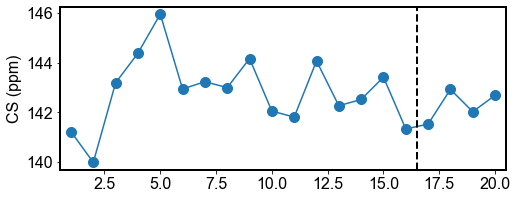

SystemExit: 0

In [13]:
# Replicate 1:
# U31-C6: Plot just w for each conformer:

# use the linear correction previously observed:
# m = 0.56, c = 63.46
m=0.56
c=63.46

# Defined ES and GS measured chemical shifts:
#wES = 93.2
#wGS = 90.4

# Filter out A35 data from DF & calculate new conf_nos:
df_t = df.loc[(df["nt_resnum"] == 31)].copy()
ens_confnums = []
for ix, row in df_t.iterrows():
    ens_confnum = list(sas_indices).index(row['conf_no']-1)+1
    ens_confnums.append(ens_confnum)
df_t["ens_confnums"] = ens_confnums

# C8 Chemical Shift
fig, axs = plt.subplots(1,1, figsize=(8, 3), sharex=True)
ax=axs
colors = ["blue"] * 16 + ["red"] * 4
ax.plot(df_t.ens_confnums, df_t.shift_aro*m+c, marker='o', markersize=10)
#ax.hlines(y=wGS, linewidth=2, xmax=16.5, xmin=0, color='green', ls="--")
#ax.hlines(y=wES, linewidth=2, xmax=20.5, xmin=16.5, color='red', ls= "--")
ax.set_ylabel("CS (ppm)")


ax.axvline(16.5, ls="--", lw=2, color='k')
plt.xlim([0.5,20.5])
plt.show()
sys.exit(0)


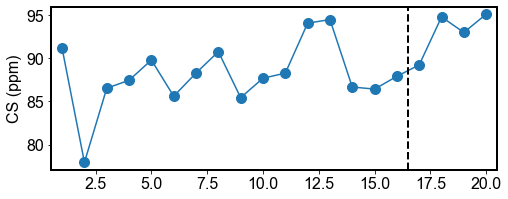

SystemExit: 0

In [14]:
# Replicate 1:
# G34-C1': Plot just w for each conformer:

# use the linear correction previously observed:
m=1.067012
c=-13.569042

# Defined ES and GS measured chemical shifts:
wES = 93.2
wGS = 90.4

# Filter out A35 data from DF & calculate new conf_nos:
df_t = df.loc[(df["nt_resnum"] == 34)].copy()
ens_confnums = []
for ix, row in df_t.iterrows():
    ens_confnum = list(sas_indices).index(row['conf_no']-1)+1
    ens_confnums.append(ens_confnum)
df_t["ens_confnums"] = ens_confnums

# C8 Chemical Shift
fig, axs = plt.subplots(1,1, figsize=(8, 3), sharex=True)
ax=axs
colors = ["blue"] * 16 + ["red"] * 4
ax.plot(df_t.ens_confnums, df_t.shift_c1p*m+c, marker='o', markersize=10)
#ax.hlines(y=wGS, linewidth=2, xmax=16.5, xmin=0, color='green', ls="--")
#ax.hlines(y=wES, linewidth=2, xmax=20.5, xmin=16.5, color='red', ls= "--")
ax.set_ylabel("CS (ppm)")


ax.axvline(16.5, ls="--", lw=2, color='k')
plt.xlim([0.5,20.5])
plt.show()
sys.exit(0)


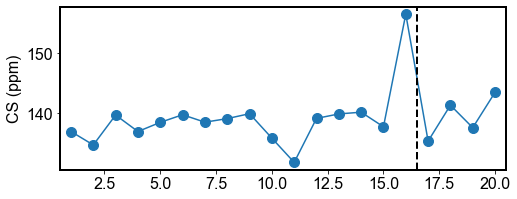

SystemExit: 0

In [15]:
# Replicate 1:
# U31-C6: Plot just w for each conformer:

# use the linear correction previously observed:
# All shifts:    m = 1.06, c = -2.30

m=1.06
c=-2.30

# Defined ES and GS measured chemical shifts:
#wES = 93.2
#wGS = 90.4

# Filter out A35 data from DF & calculate new conf_nos:
df_t = df.loc[(df["nt_resnum"] == 34)].copy()
ens_confnums = []
for ix, row in df_t.iterrows():
    ens_confnum = list(sas_indices).index(row['conf_no']-1)+1
    ens_confnums.append(ens_confnum)
df_t["ens_confnums"] = ens_confnums

# C8 Chemical Shift
fig, axs = plt.subplots(1,1, figsize=(8, 3), sharex=True)
ax=axs
colors = ["blue"] * 16 + ["red"] * 4
ax.plot(df_t.ens_confnums, df_t.shift_aro*m+c, marker='o', markersize=10)
#ax.hlines(y=wGS, linewidth=2, xmax=16.5, xmin=0, color='green', ls="--")
#ax.hlines(y=wES, linewidth=2, xmax=20.5, xmin=16.5, color='red', ls= "--")
ax.set_ylabel("CS (ppm)")


ax.axvline(16.5, ls="--", lw=2, color='k')
plt.xlim([0.5,20.5])
plt.show()
sys.exit(0)


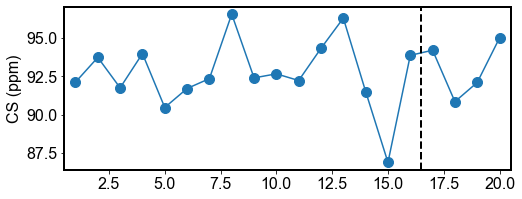

SystemExit: 0

In [16]:
# Replicate 1:
# G34-C1': Plot just w for each conformer:

# use the linear correction previously observed:
m=1.067012
c=-13.569042

# Defined ES and GS measured chemical shifts:
wES = 93.2
wGS = 90.4

# Filter out A35 data from DF & calculate new conf_nos:
df_t = df.loc[(df["nt_resnum"] == 35)].copy()
ens_confnums = []
for ix, row in df_t.iterrows():
    ens_confnum = list(sas_indices).index(row['conf_no']-1)+1
    ens_confnums.append(ens_confnum)
df_t["ens_confnums"] = ens_confnums

# C8 Chemical Shift
fig, axs = plt.subplots(1,1, figsize=(8, 3), sharex=True)
ax=axs
colors = ["blue"] * 16 + ["red"] * 4
ax.plot(df_t.ens_confnums, df_t.shift_c1p*m+c, marker='o', markersize=10)
#ax.hlines(y=wGS, linewidth=2, xmax=16.5, xmin=0, color='green', ls="--")
#ax.hlines(y=wES, linewidth=2, xmax=20.5, xmin=16.5, color='red', ls= "--")
ax.set_ylabel("CS (ppm)")


ax.axvline(16.5, ls="--", lw=2, color='k')
plt.xlim([0.5,20.5])
plt.show()
sys.exit(0)
